# Google Colab 데이터 로드

In [ ]:
#Step 1. 구글 코랩에 한글 폰트 설정하기

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
#Step 2.분석할 데이터가 저장된 파일을 불러와서 변수에 할당합니다.
from google.colab import files
myfile = files.upload()
import io
import pandas as pd
#pd.read_csv로 csv파일 불러오기
src_data = pd.read_csv(io.BytesIO(myfile['의사결정나무_과일종류_2가지.csv']),
                       encoding='cp949')
src_data

# 로컬 데이터 로드

In [5]:
#컴퓨터에서 작업하려면 아래 코드의 주석을 제거하고 실행하면 됩니다
import pandas as pd
src_data = pd.read_csv('../../머신러닝실습용자료/의사결정나무_과일종류_2가지.csv',encoding='cp949')
src_data

,종류,무게,길이
0,수박,2000,30.0
1,수박,2500,25.0
2,수박,1800,20.0
3,수박,1500,16.0
4,수박,1900,19.0
5,수박,600,9.0
6,참외,500,8.0
7,참외,400,7.5
8,참외,450,5.0
9,참외,400,4.5


# 공통 실습 코드

In [6]:
#Step 3.주어진 데이터를 훈련용 데이터와 검증용 데이터로 나눕니다

# 무게, 길이에 따른 종류 판별
data = src_data[['무게','길이']].to_numpy()
target = src_data['종류'].to_numpy()

print(data)
print(target)

# train, test 데이터 분리
from sklearn.model_selection import train_test_split
훈련용_data, 테스트용_data, 훈련용_target, 테스트용_target = train_test_split(
    data, target, test_size=0.2, random_state=40)

[[2000.    30. ]
 [2500.    25. ]
 [1800.    20. ]
 [1500.    16. ]
 [1900.    19. ]
 [ 600.     9. ]
 [ 500.     8. ]
 [ 400.     7.5]
 [ 450.     5. ]
 [ 400.     4.5]
 [ 600.     9.5]
 [ 550.     8.5]]
['수박' '수박' '수박' '수박' '수박' '수박' '참외' '참외' '참외' '참외' '참외' '참외']


In [7]:
print(훈련용_data.shape , 테스트용_data.shape)
print(훈련용_target)

(9, 2) (3, 2)
['수박' '수박' '수박' '수박' '수박' '참외' '수박' '참외' '참외']


In [10]:
# Step 4.훈련용 데이터로 모델 생성후 테스트용 데이터로 모델을 검증합니다.
from sklearn.tree import DecisionTreeClassifier

# 의사결정나무 분류기 생성
dt = DecisionTreeClassifier(random_state=40)

# 학습
dt.fit(훈련용_data, 훈련용_target)

# score 출력
print('훈련용 데이터:', dt.score(훈련용_data, 훈련용_target))
print('테스트용 데이터:', dt.score(테스트용_data, 테스트용_target))

# 예측 : 수박이 나오면 성공
dt.predict([[1500,15]])

훈련용 데이터: 1.0
테스트용 데이터: 0.6666666666666666


array(['수박'], dtype=object)

In [14]:
# split하지 않은 데이터로 모델 훈련 다시 진행(판단 과정을 그림으로 확인하기 위함)
dt = DecisionTreeClassifier(random_state=40, criterion='entropy')
dt.fit(data, target)

DecisionTreeClassifier(criterion='entropy', random_state=40)

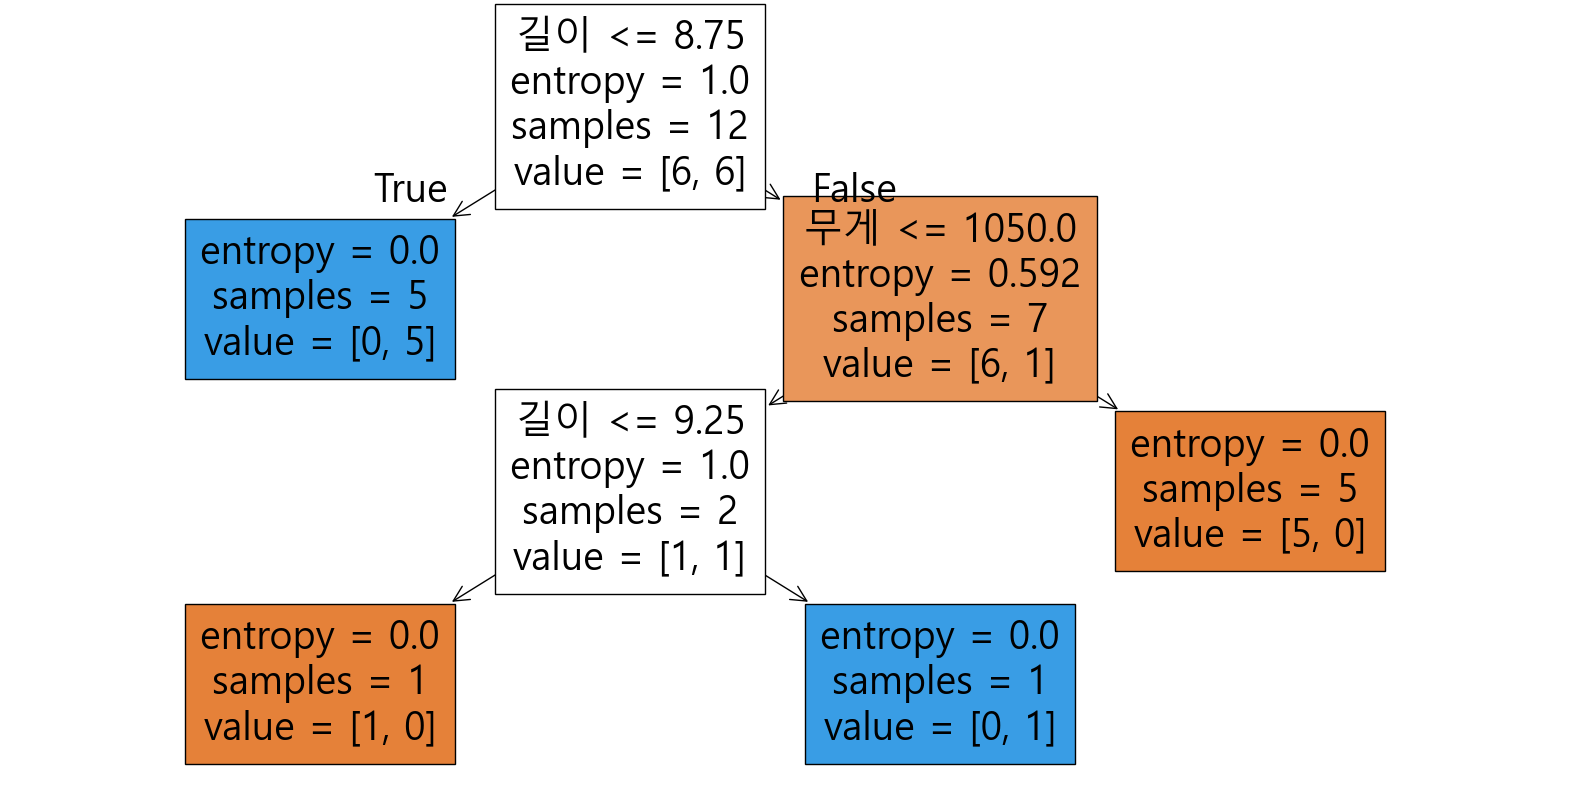

In [17]:
#Step 5. 판단 과정을 그림으로 확인합니다.
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_location = 'C:\Windows\Fonts\malgun.ttf'

font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font' , family=font_name)

from sklearn.tree import plot_tree
plt.figure( figsize=(20,10))
plot_tree(dt, max_depth=5 , filled=True ,
          feature_names=['무게','길이'] )

plt.show()